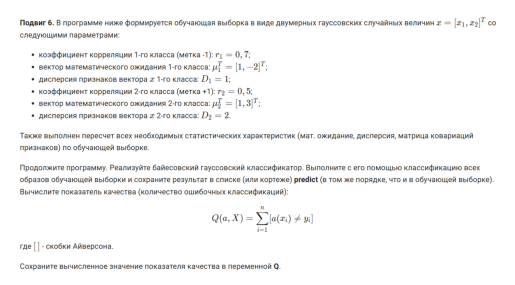

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/3_5_1.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

In [4]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [1, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# обучающая выборка для байесовского классификатора (стандартный формат)
x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])


# вычисление оценок математических ожиданий
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

# вычисление ковариационных матриц
a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
print(a)
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])
print(VV2)

# параметры для гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации


bayes = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(np.linalg.det(v))
predict = [] # список классифицирующих образов
for X in x_train:
    a = np.argmax([bayes(X, VV1, mm1, L1, Py1), bayes(X, VV2, mm2, L2, Py2)]) * 2 - 1
    predict.append(a)

Q = sum([1 if predict[x] != list(y_train)[x] else 0 for x in range(len(y_train))])
print(Q)


[[ 3.0036792   0.53686571  0.5123734  ... -0.21171052 -2.24219159
  -1.44109653]
 [ 0.58706304 -0.81400522 -0.47855833 ... -0.91984317 -2.28095229
  -2.58609702]]
[[1.95124062 0.99608906]
 [0.99608906 1.95589618]]
4


In [ ]:
# подобная задача, но для трехмерного пространства

import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [-1, -2, -1]
V1 = [[D1, D1 * r1, D1*r1*r1], [D1 * r1, D1, D1*r1], [D1*r1*r1, D1*r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [1, 2, 1]
V2 = [[D2, D2 * r2, D2*r2*r2], [D2 * r2, D2, D2*r2], [D2*r2*r2, D2*r2, D2]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# обучающая выборка для байесовского классификатора (стандартный формат)
x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# вычисление оценок математических ожиданий
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

# вычисление ковариационных матриц
a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N, np.dot(a[0], a[2]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N, np.dot(a[1], a[2]) / N],
                [np.dot(a[2], a[0]) / N, np.dot(a[2], a[1]) / N, np.dot(a[2], a[2]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N, np.dot(a[0], a[2]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N, np.dot(a[1], a[2]) / N],
                [np.dot(a[2], a[0]) / N, np.dot(a[2], a[1]) / N, np.dot(a[2], a[2]) / N]])

# параметры для гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации


bayes = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(np.linalg.det(v))
predict = [] # список классифицирующих образов
for X in x_train:
    a = np.argmax([bayes(X, VV1, mm1, L1, Py1), bayes(X, VV2, mm2, L2, Py2)]) * 2 - 1
    predict.append(a)

Q = sum([1 if predict[x] != list(y_train)[x] else 0 for x in range(len(y_train))])
print(Q)

78


In [10]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений трех классов
r1 = 0.7
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-3, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

r3 = 0.3
D3 = 1.0
mean3 = [1, 2]
V3 = [[D3, D3 * r3], [D3 * r3, D3]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T
x3 = np.random.multivariate_normal(mean3, V3, N).T

x_train = np.hstack([x1, x2, x3]).T
y_train = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)
mm3 = np.mean(x3.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x3.T - mm3).T
VV3 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# параметры для гауссовского байесовского классификатора
Py1, Py2, Py3 = 0.2, 0.5, 0.3
L1, L2, L3 = 1, 1, 1

# здесь продолжайте программу
bayes = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(np.linalg.det(v))
predict = [] # список классифицирующих образов
for X in x_train:
    a = np.argmax([bayes(X, VV1, mm1, L1, Py1), bayes(X, VV2, mm2, L2, Py2), bayes(X, VV3, mm3, L3, Py3)]) + 1
    predict.append(a)

Q = sum([1 if predict[x] != list(y_train)[x] else 0 for x in range(len(y_train))])
print(predict)

[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 